In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torchaudio
from torchaudio import datasets, transforms
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import torch.optim as optim
import math

In [ ]:
#Processing the data:

#transfer the nueral net onto a gpu

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device) #this shiuld print the device that is being used

'''

file_name = "/content/drive/MyDrive/clean_trainset_28spk_wav/p226_140.wav"

waveform, sample_rate = torchaudio.load(file_name)

transformed_spec = transforms.MelSpectrogram(sample_rate=sample_rate,n_fft=1024, hop_length=512, n_mels=64)

spectrogram = transformed_spec(waveform)

print(waveform.shape)
print(sample_rate)

plt.figure()
plt.plot(waveform.t())
plt.title("Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


plt.figure()
plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='rainbow')
plt.title("Spectrogram")
plt.show()

#print(spectrogram_list)

#print(waveform.shape)
#print(sample_rate)

#plt.figure()
#plt.plot(waveform.t())
#plt.title("Waveform")
#plt.xlabel("Time")
#plt.ylabel("Amplitude")
#plt.show()

#transformed_spec = transforms.MelSpectrogram(sample_rate=sample_rate,n_fft=1024, hop_length=512, n_mels=64)

#spectrogram = transformed_spec(waveform)
'''


cpu


'\n\nfile_name = "/content/drive/MyDrive/clean_trainset_28spk_wav/p226_140.wav"\n\nwaveform, sample_rate = torchaudio.load(file_name)\n\ntransformed_spec = transforms.MelSpectrogram(sample_rate=sample_rate,n_fft=1024, hop_length=512, n_mels=64)\n\nspectrogram = transformed_spec(waveform)\n\nprint(waveform.shape)\nprint(sample_rate)\n\nplt.figure()\nplt.plot(waveform.t())\nplt.title("Waveform")\nplt.xlabel("Time")\nplt.ylabel("Amplitude")\nplt.show()\n\n\nplt.figure()\nplt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap=\'rainbow\')\nplt.title("Spectrogram")\nplt.show()\n\n#print(spectrogram_list)\n\n#print(waveform.shape)\n#print(sample_rate)\n\n#plt.figure()\n#plt.plot(waveform.t())\n#plt.title("Waveform")\n#plt.xlabel("Time")\n#plt.ylabel("Amplitude")\n#plt.show()\n\n#transformed_spec = transforms.MelSpectrogram(sample_rate=sample_rate,n_fft=1024, hop_length=512, n_mels=64)\n\n#spectrogram = transformed_spec(waveform)\n'

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")


noisy_train = "/content/drive/MyDrive/noisy_trainset_28spk_wav"
#noisy_test = ""

#clean_train = "/content/drive/MyDrive/clean_trainset_28spk_wav"
#clean_test = "/content/drive/MyDrive/clean_testset_wav"

noisy_test = "/content/drive/MyDrive/noisy_testset_wav"

noisy_labels = "/content/drive/MyDrive/logfiles/log_trainset_28spk.txt"
#this file lists all the wav files , their noise data, and SNR(dB)

#we already have a dataset,, so we are going to make a list of the wav files

#after that, we can add a transformation into a Mel Spectrogram

#batch size = 64

#noisy_file_list = []
#noisy_wav_list = []

#label_list = []

#noisy_spectrogram_list = []
#clean_spectrogram_list = []

#spectrogram_list = []

#this function should go through each file in the directory and add it to the list
'''
for noisy_file in os.listdir(noisy_train):
    if noisy_file.endswith(".wav"):
        noisy_wav_list.append(noisy_file)
        noisy_file_list.append(os.path.join(noisy_train, noisy_file))

#not the best way to do this,, but
index = 0
f = open(labels, "r")
for x in f:
  split = x.split()
  if split[0] == noisy_wav_list[index]:
    label_list.append(split[2])
    index += 1

print(label_list)
print(noisy_file_list)

'''

#custom dataset needs :
#__init__
#__len__
#__getitem__
#otherwise dataloader bugs out


#for clean_file in os.listdir(clean_train):
#    if clean_file.endswith(".wav"):
#        clean_file_list.append(os.path.join(clean_train, clean_file))


#transform = transforms.Compose([
    #transforms.ToTensor(),
    #transforms.MelSpectrogram(sample_rate=22050,n_fft=1024, hop_length=512, n_mels=64),
    #transforms.Normalize(0,1)
#])


#noisy_train_set = torchaudio.load(iter(noisy_file_list))
#clean_train_set = torchaudio.load(uri = clean_train, transform=transform

#train_loader = DataLoader(noisy_train_set, batch_size=batch_size, shuffle=True, transform=transform)

#test_loader = DataLoader(clean_file_list, batch_size=batch_size, shuffle=True)

#file_name = "/content/drive/MyDrive/noisy_trainset_28spk_wav/p226_140.wav"

#transformed_spec = transforms.MelSpectrogram(sample_rate=sample_rate,n_fft=1024, hop_length=512, n_mels=64)


#loading data in this way takes way too long to do,,
#Use dataloader instead

#for i in range(len(noisy_file_list)):
#  noisy_file_name = noisy_file_list[i]

#  waveform, sample_rate = torchaudio.load(noisy_file_name)

#  noisy_spectrogram = transformed_spec(waveform)
#  noisy_spectrogram_list.append(noisy_spectrogram)


#for i in range(len(clean_file_list)):
#  clean_file_name = clean_file_list[i]

#  waveform, sample_rate = torchaudio.load(clean_file_name)

#  clean_spectrogram = transformed_spec(waveform)
#  clean_spectrogram_list.append(clean_spectrogram)
#print(spectrogram_list)

#print(waveform.shape)
#print(sample_rate)

#plt.figure()
#plt.plot(waveform.t())
#plt.title("Waveform")
#plt.xlabel("Time")
#plt.ylabel("Amplitude")
#plt.show()

#transformed_spec = transforms.MelSpectrogram(sample_rate=sample_rate,n_fft=1024, hop_length=512, n_mels=64)

#spectrogram = transformed_spec(waveform)

#plt.figure()
#plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='rainbow')
#plt.title("Spectrogram")
#plt.show()

#CNN


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'\nfor noisy_file in os.listdir(noisy_train):\n    if noisy_file.endswith(".wav"):\n        noisy_wav_list.append(noisy_file)\n        noisy_file_list.append(os.path.join(noisy_train, noisy_file))\n\n#not the best way to do this,, but \nindex = 0\nf = open(labels, "r")\nfor x in f:\n  split = x.split()\n  if split[0] == noisy_wav_list[index]:\n    label_list.append(split[2])\n    index += 1\n\nprint(label_list)\nprint(noisy_file_list)\n\n'

In [ ]:
noisy = []
labels_list =[]

for noisy_file in os.listdir(noisy_train):
    #if noisy_file.endswith(".wav"):
  noisy.append(noisy_file)
        #noisy_file_list.append(os.path.join(noisy_train, noisy_file))
'''
index =0
f = open(noisy_labels, "r")
for x in f:
  split = x.split(" ")
  if split[0] == noisy[index]:
    labels_list.append(split[2])
    print(split[2])
    index += 1
'''

'\nindex =0\nf = open(noisy_labels, "r")\nfor x in f:\n  split = x.split(" ")\n  if split[0] == noisy[index]:\n    labels_list.append(split[2])\n    print(split[2])\n    index += 1\n'

In [ ]:
#custom data set

transformer = transforms.MelSpectrogram(sample_rate=22050,n_fft=1024, hop_length=512, n_mels=64)


batch_size = 64
fixed_length = 225

#label_list = []
#noisy_wav_list = []
#index = 0

#with open(noisy_labels, "r") as f:
#  label_data = f.readlines()

#for line in label_data:
#  split = line.split(" ")
#  #for i in noisy_wav_list:
#  if split[0] == str(noisy[index]):
#    index += 1
#    label_list.append(split[2])


class custom_data(Dataset):
    def __init__(self, training_set, labels, transform=None):
      #self.noisy = []

      #for noisy_file in os.listdir(noisy_train):
          #if noisy_file.endswith(".wav"):
              #self.noisy.append(noisy_file)
      self.audiolist = training_set
      self.noisy_wav_list = []
      self.transform = transform
      self.labels = labels
      self.label_list = []
      #self.index = 0

      for noisy_file in os.listdir(self.audiolist):
        if noisy_file.endswith(".wav"):
          self.noisy_wav_list.append(noisy_file)

      with open(self.labels, "r") as f:
        label_data = f.readlines()

      for line in label_data:
        split = line.strip().split(" ")
        #for i in self.noisy_wav_list:
          #if split[0] == i:
        self.label_list.append(split[2])
            #self.index += 1

      print(len(self.noisy_wav_list))
      print(len(self.label_list))

      #self.noisy_file_list = []



    def __len__(self):
      return len(self.noisy_wav_list)

    def __getitem__(self, idx):
      #index = 0


      #index = 0
      audio_path = os.path.join(self.audiolist, self.noisy_wav_list[idx])
      waveform, sr = torchaudio.load(audio_path)

          #not the best way to do this,, but

      if self.transform:
        spectrogram = self.transform(waveform)
        spectrogram = self.pad_spectrogram(spectrogram, fixed_length)
      label = self.label_list[idx]
        #print(label)
        #self.i += 1
      return spectrogram, label


    def pad_spectrogram(self, spectrogram, max_length):
        if spectrogram.size(2) < max_length:
            pad_amount = max_length - spectrogram.size(2)
            spectrogram = torch.nn.functional.pad(spectrogram, (0, pad_amount))
        else:
            spectrogram = spectrogram[:, :, :max_length]
        return spectrogram


#dataloaders

noisy_dataset = custom_data(training_set=noisy_train, labels=noisy_labels, transform=transformer)

train_dataloader = DataLoader(noisy_dataset, batch_size=64,  shuffle=True)




11602
11572


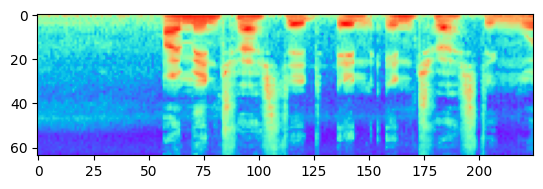

Label: 15


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
#print(f"Feature batch shape: {train_features.size()}")
#print(f"Labels batch shape: {train_labels.size()}")
#print()
img = train_features[0].squeeze()
label = train_labels[0]
#plt.imshow(img, cmap="rainbow")
plt.imshow(img.log2().numpy(), cmap='rainbow')
plt.show()
print(f"Label: {label}")

In [ ]:
import torch.nn as nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)

        self.conv4 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1)


        self.maxPool = nn.MaxPool2d(kernel_size=2)

        self.up_conv = nn.ConvTranspose2d(kernel_size=2)

        #self.flatten = nn.Flatten()
        #self.fc1 = nn.Linear(128*5*4, 128)
        #self.fc2 = nn.Linear(128, 1)

        #self.dropout = nn.Dropout(0.5)

        self.sigmoid = nn.Sigmoid()

    def encode(self, x):
      first_layer = self.conv1(x)
      first_relu = nn.functional.relu(first_layer)
      first_pool = self.maxPool(first_relu)

      second_layer = self.conv2(first_pool)
      second_relu = nn.functional.relu(second_layer)
      second_pool = self.maxPool(second_relu)

      third_layer = self.conv3(second_pool)
      third_relu = nn.functional.relu(third_layer)
      third_pool = self.maxPool(third_relu)

      return third_pool


    def decode(self, y):
      fourth_layer = self.conv4(y)
      fourth_relu = nn.functional.relu(fourth_layer)

      fifth_layer = self.conv5(fourth_relu)
      fifth_relu = nn.functional.relu(fifth_layer)

      sixth_layer = self.conv6(fifth_layer)
      sixth_relu = nn.functional.relu(sixth_layer)

      return self.sigmoid(sixth_relu)



    def forward(self, x):

      z = self.encode(x)
        #layer1
        #x = self.conv1(x)
        #x = nn.functional.relu(x)
        #x = self.pool(x)

        #layer 2
        #x = self.conv2(x)
        #x = nn.functional.relu(x)
        #x = self.pool(x)

        #layer 3
        #x = self.conv3(x)
        #x = nn.functional.relu(x)
        #x = self.pool(x)

        #flatten
        #x = torch.flatten(x, 1)

        #a fully conv layer with relu
        #x = self.fc1(x)
        #x = nn.functional.relu(x)
        #x = self.dropout(x)
        #apply the dropout

        #x = self.sigmoid(x)

      return self.decode(z)


net=Net()

epoch_num =5
# Initialize the model
model = Net()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
def one_epoch(model,input_list, loss_fn,optimizer,device):
    train_loss = 0.0
    for batch, data in enumerate(input_list):
        #input = input_list[i]
        #output = output_list[i]
        #forward pass
        spec, labels = data
        #spec = spec.to(device)
        #labels = labels.to(device)
        #outputs = model(input)
        #loss = loss_fn(outputs, output)

        optimizer.zero_grad()

        output = model(spec)
        loss = criterion(output, spec)
        loss.backward()
        train_loss += loss.item() * spec.size(0)
        optimizer.step()

        if batch % 100 == 0:
          print('epoch: {} [{}/{} ({:.0f}%)]\train loss: {:.6f}'.format(epoch_num, labels * len(spec), len(train_dataloader.dataset),
                                                                           100. * labels /
                                                                           len(train_dataloader),
                                                                           loss.item()))

    print('epoch: {} Avg loss: {:.4f}'.format(
        epoch_num, train_loss / len(train_dataloader.dataset)))


        #loss.backward()
        #optimizer.step()

    #print(f"loss:{loss.item()}")

#def one_epoch(model,input_list, loss_fn,optimizer,device):

def train(model,input_list,loss_fn,optimizer,device,num_epochs):
    for epoch in range(num_epochs):
        one_epoch(model,train_dataloader,loss_fn=criterion,optimizer=optimizer,device=device)


train(model,train_dataloader,criterion,optimizer,device,epoch_num)

print("training complete!")

#epoch = 0

#print(f'Epoch [{epoch+1}/{epoch_num}], Loss: {criterion.item():.4f}')

RuntimeError: Given groups=1, weight of size [128, 64, 3, 3], expected input[64, 1, 64, 225] to have 64 channels, but got 1 channels instead

In [ ]:
#testing the model


In [ ]:
#class to load Noisy Speech Data

'''

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

        self.maxPool = nn.MaxPool2d(kernel_size=2)

        #self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128*5*4, 128)
        self.fc2 = nn.Linear(128, 1)

        self.dropout = nn.Dropout(0.5)

        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        #layer1
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)

        #layer 2
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)

        #layer 3
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.pool(x)

        #flatten
        x = torch.flatten(x, 1)

        #a fully conv layer with relu
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        #apply the dropout

        x = self.sigmoid(x)

        return x


net=Net()


num_epoch = 2


#instantiate the CNN model
#cnn = Net()


#Loss function and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)



def one_epoch(model,input_list, output_list,loss_fn,optimizer,device):
    for i in range(len(input_list)):
        input = input_list[i]
        output = output_list[i]
        #forward pass
        input = input.to(device)
        output = output.to(device)
        outputs = model(input)
        loss = loss_fn(outputs, output)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #print(f"loss:{loss.item()}")


def train(model,input_list,output_list,loss_fn,optimizer,device,num_epochs):
    for epoch in range(num_epochs):
        one_epoch(model,noisy_spectrogram_list,clean_spectrogram_list,loss_fn=criterion,optimizer=optimizer,device=device)


train(net,transformed_data,criterion,optimizer,device,num_epoch)

print("training complete!")




#torch.save(net, "\Users\Maisoon\audio stuff\Audio-Signal-Denoising-Project-")



transform = transforms.MelSpectrogram(sample_rate=22050,n_fft=1024, hop_length=512, n_mels=64)

wav_files = []
for filename in os.listdir(noisy_train):
    if filename.endswith(".wav"):
        wav_files.append(os.path.join(noisy_train, filename))


for i in range(len(wav_files)):
  waveform, sample_rate = torchaudio.load(wav_files[i])
  mel_spectrogram = transform(waveform)

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)



fixed_length = 22050

def load(file_path):
    waveform, sample_rate = torchaudio.load(file_path)
    return waveform, sample_rate

transform = transforms.MelSpectrogram(sample_rate=22050,n_fft=1024, hop_length=512, n_mels=64)

#sample rate of 8Hkz

def pad_or_truncate(waveform, length):
    if waveform.size(1) > length:
        return waveform[:, :length]
    else:
        pad_size = length - waveform.size(1)
        return torch.nn.functional.pad(waveform, (0, pad_size))


batch_size = 32

class NoisySpeech(Dataset):
    def __init__(self, path, transform=None, device=device, fix_len=22050):
        self.List = []
        for f in os.listdir(path):
            if f.endswith('.wav'):
                self.List.append(os.path.join(path,f))
        self.pathsList = self.List
        self.path = path
        self.transform = transform
        self.device = device
        self.fixed_length = fix_len
        self.transformlist = []
        self.sr = 22050
        self.n_mels = 128
        self.hop_length = 512

    def __len__(self):
        return len(self.pathsList)


    def __getitem__(self, idx):
        noisy_path = self.pathsList[idx]
        #clean_path = self.clean_files[idx]

        noisy, _ = torchaudio.load(noisy_path, sr=self.sr)
        #clean, _ = librosa.load(clean_path, sr=self.sr)

        noisy_mel = transforms.MelSpectrogram(y=noisy, sr=self.sr, n_mels=self.n_mels, hop_length=self.hop_length)
        #clean_mel = librosa.feature.melspectrogram(y=clean, sr=self.sr, n_mels=self.n_mels, hop_length=self.hop_length)

        noisy_mel_db = librosa.power_to_db(noisy_mel, ref=np.max)
        #clean_mel_db = librosa.power_to_db(clean_mel, ref=np.max)

        noisy_mel_db = torch.tensor(noisy_mel_db).unsqueeze(0)
        #clean_mel_db = torch.tensor(clean_mel_db).unsqueeze(0)

        return noisy_mel_db

        #file_path = self.pathsList[idx]
    #    waveform, sample_rate = load(file_path)
    #    waveform = pad_or_truncate(waveform, self.fixed_length)
    #    if self.transform:
    #        waveform = self.transform(waveform)
    #        self.transformlist.append(waveform)
    #    return waveform, sample_rate

def create_dataloaders(path, batch_size=32, device=device):
    dataset = NoisySpeech(path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    return dataloader

transformed_data = []


#noisy_train = "\\Users\\Maisoon\\Documents\\Audio-Signal-Denoising-Project-\\noisy_trainset_28spk_wav"
#noisy_test = "\\Users\\Maisoon\\Documents\\Audio-Signal-Denoising-Project-\\noisy_testset_wav"

#clean_train= "\\Users\\Maisoon\\Documents\\Audio-Signal-Denoising-Project-\\clean_trainset_28spk_wav"
#clean_test = "\\Users\\Maisoon\\Documents\\Audio-Signal-Denoising-Project-\\clean_testset_wav"


#noisy training data
nosiy_trainDataset = NoisySpeech(path=noisy_train, transform=transform, device=device)
#print(nosiy_trainDataset.pathsList)
noisy_trainDataloader = DataLoader(nosiy_trainDataset, batch_size=32, shuffle=True)

#noisy test data
#nosiy_testDataset = NoisySpeech(path=noisy_test, transform=transform)
#noisy_testDataloader = DataLoader(nosiy_trainDataset, batch_size=32, shuffle=True)

#clean training data
clean_trainDataset = NoisySpeech(path=clean_train, transform=transform)
clean_trainDataloader = DataLoader(nosiy_trainDataset, batch_size=32, shuffle=True)

#clean test data
clean_testDataset = NoisySpeech(path=clean_test, transform=transform)
clean_testDataloader = DataLoader(nosiy_trainDataset, batch_size=32, shuffle=True)

filename = nosiy_trainDataset.pathsList[0]


dataloader = create_dataloaders(noisy_train, batch_size, device=device)

first_batch, _ = next(iter(dataloader))
first_waveform = first_batch[0].numpy()

print(first_waveform)

plt.figure(figsize=(10, 4))
plt.specgram(first_waveform[0], Fs=22050, NFFT=1024, noverlap=512, cmap="rainbow")
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()


#filename = nosiy_trainDataset.pathsList[0]

'''



In [ ]:

'''
class DenoisingLinearModel(nn.Module):
    def __init__(self, input, output):
        super(DenoisingLinearModel, self).__init__()
        self.linear = nn.Linear(input, output) ##one layer to

    def forward(self, x):
        x = self.linear(x)
        return x

input_var = 150
output_var = 150

ln_model = DenoisingLinearModel(input_var, output_var)

loss_fn = nn.MSELoss()
optimizer=torch.optim.SGD(ln_model, lr = 0.01)

correct = 0
total = 0

num_epochs = 10
for epoch in range(num_epochs):
    for noisy, clean in clean_trainDataloader:
        #noisy, clean = data
        output = ln_model(noisy)
        _, predicted = torch.max(output.data, 1)
        loss = loss_fn(output, clean)
        total += clean.size(0)
        correct += (predicted == clean).sum().item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
'''

In [ ]:
#GUI

import tkinter as tk
from tkinter import filedialog

waveform = None
sample_rate = None

def open_file():
    file_path = filedialog.askopenfilename()
    global waveform
    global sample_rate
    waveform, sample_rate = torchaudio.load(file_path)
    return waveform, sample_rate

def download_file():
    file_path = filedialog.asksaveasfilename()
    if waveform is None or sample_rate is None:
        pass
    else:
        torchaudio.save(file_path, waveform, sample_rate)
    return

def run_model():
    #run the model
    pass

#3 buttons, one to ask for audio file and one to run the model, and another to download the file
root = tk.Tk()
root.title("Audio Denoising")
root.geometry("400x400")
button1 = tk.Button(root, text="Open File", command=open_file)
button1.pack()
button2 = tk.Button(root, text="Run Model", command=run_model)
button2.pack()
button3 = tk.Button(root, text="Download File", command=download_file)
button3.pack()
root.mainloop()
